<a href="https://colab.research.google.com/github/sakshi0102/machinelearning_lab_CS3/blob/master/Copy_of_LRdon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 class MyLinearRegression:
    def __init__(self, weight=1  , bias= 8  , learning_rate=0.008  ,
                 iterations= 140   ):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


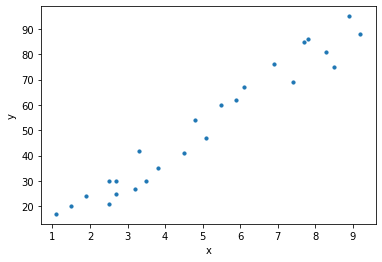

In [6]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [5.66891556]	 Bias: [8.69057778]	 Cost: 212.12902631834507
Iteration: 1	 Weight: [7.56002204]	 Bias: [8.95882673]	 Cost: 51.97853955112422
Iteration: 2	 Weight: [8.32700928]	 Bias: [9.05619823]	 Cost: 25.732878309185352
Iteration: 3	 Weight: [8.63908714]	 Bias: [9.08444873]	 Cost: 21.416010027454075
Iteration: 4	 Weight: [8.76706932]	 Bias: [9.08475663]	 Cost: 20.690370810938717
Iteration: 5	 Weight: [8.82054785]	 Bias: [9.07378579]	 Cost: 20.55294037470604
Iteration: 6	 Weight: [8.84387209]	 Bias: [9.05827963]	 Cost: 20.51193373354265
Iteration: 7	 Weight: [8.8549892]	 Bias: [9.04096695]	 Cost: 20.48681405703406
Iteration: 8	 Weight: [8.861162]	 Bias: [9.02295199]	 Cost: 20.464391867817294
Iteration: 9	 Weight: [8.86532958]	 Bias: [9.00468151]	 Cost: 20.442506715179466
Iteration: 10	 Weight: [8.86868136]	 Bias: [8.98633624]	 Cost: 20.420804300680963
Iteration: 11	 Weight: [8.87169865]	 Bias: [8.96798924]	 Cost: 20.399226109900074
Iteration: 12	 Weight: [8.8745762

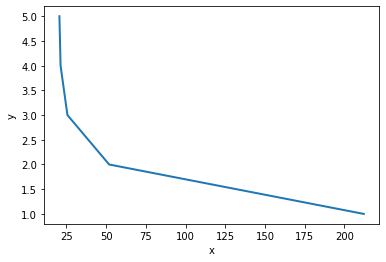

In [15]:
x=[212.12902631834507,51.97853955112422,25.732878309185352, 21.416010027454075,20.690370810938717] 
y=[1,2,3,4,5]
plt. plot(x, y, linewidth=2.0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()